# Projeto Ice: loja de games e suas campanhas publicitárias

O **projeto da loja de games Ice** se destina a trabalhar e analisar os dados de vendas de jogos até o período de 2016, a fim de programar e produzir campanhas publicitárias para as vendas do ano de 2017.

Durante o projeto, serão observados dados de vendas em conjunto, com especificações por plataformas, gêneros, análise do perfil regional de venda de cada jogo e afins. A ideia ao final do projeto será construir perfis específicos de clientes.

Dessa forma, será possível informar ao departamento comercial quais as abordagens ideais para a produção de campanhas de venda, voltadas para cada plataforma em específico, para cada gênero de jogo e região de comércio.

## 1. Descrição dos dados

Para começar, vamos analisar o conjunto de dados em tela, o qual possui diversos dados da venda de jogos ao longo dos anos, distríbuidos nas seguintes categorias:

- **Name:** nome do jogo

- **Platform:** plataforma do jogo

- **Year_of_Release:** ano de lançamento

- **Genre:** gênero do jogo

- **NA_sales:** vendas norte-americanas em milhões de USD.

- **EU_sales:** vendas na Europa em milhões de USD.

- **JP_sales:** vendas no Japão em milhões de USD.

- **Other_sales:** vendas em outros países em milhões de USD.

- **Critic_Score:** avaliação da crítica (máximo de 100)

- **User_Score:** avaliação dos usuários (máximo de 10)

- **Rating:** categorias de classificação ESRB (Entertainment Software Rating Board) com base em seu conteúdo e na faixa etária recomendada.

    - *E (Everyone 6+):* adequado para todos. Pode conter violência muito leve ou humor sutil.

    - *E10+ (Everyone 10 and older):* um pouco mais de ação, humor ou temas que crianças mais novas podem não entender.

    - *T (Teen 13+):* pode conter violência, linguagem moderada ou temas sugestivos.

    - *M (Mature 17+):* violência intensa, sangue, linguagem forte ou conteúdo sexual.

### 1.1 Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

### 1.2 Importando os dados

In [2]:
# Importando os dados
df = pd.read_csv('./datasets/games.csv')

In [3]:
# Visualização inicial dos dados
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Observando os dados e seus tipos, percebemos uma parcela de dados ausente na coluna *Year_of_Release*. Provavelmente, na época de registro desses dados, não havia um rígido controle de inserção no banco de dados, e os mesmos foram esquecidos. Portanto, para essa coluna, iremos atribuir o valor 0 para esses dados ausentes, para que não interfiram em nossa análise.

Além disso, essa coluna está apresentada como **tipo object**. Faremos a conversão para o **tipo int**, mais adequado para representar valores inteiros como anos.

Igualmente, as colunas com dados de avaliação *Critic_Score, User_Score* e *Rating* também apresentam valores ausentes. Alguns jogos mais antigos e outros que não tiveram tanto destaque passaram batido por avaliação. A princípio manteremos esses dados como nulos, já que não podemos associar seus valores.

Ademais, é possível observar que a coluna *User_Score* é apresentada como object. Para valores de notas (classificação), é recomendável que esse valor seja int ou float, para que possamos trabalhar métodos matemáticos e estatísticos sobre seus valores. Nesse caso, atribuíremos o **tipo float** a essa variável.

## 2. Preparando os dados

In [5]:
# Utilizamos o método de list comprehension para transformar os nomes das colunas em letras minúsculas e os exibimos.

df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Preenchemos os valores ausentes com o número 0.
df.fillna({'year_of_release': 0}, inplace=True)

# Convertemos a coluna para números inteiros.
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
# Exibindo os valores únicos de user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Aqui notamos a presença do valor **TBD (to be determined)**. Para seu tratamento, iremos converter esses valores para nulo, valor esse já presente em nossa coluna.

In [8]:
# Fazendo a conversão de TBD para valor nulo.
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Convertendo a coluna user_score para o tipo float.
df['user_score'] = df['user_score'].astype(float)

In [9]:
# Verificando outros possíveis valores nulos.
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Identificamos a presença de dois valores nulos nas colunas *name* e *genre*. Para que esses valores não interfiram em nosso projeto, e por se tratar de uma quantia insignificante perante nosso conjunto de dados, iremos excluir esses registros de nossa análise.

In [10]:
# Selecionando e excluindo os valores nulos da tabela.
df.dropna(subset=['name', 'genre'], inplace=True)

Para uma análise mais aprofundada das vendas, iremos criar a coluna *total_sales*, que irá representar as vendas totais de cada produto, somando os valores de vendas de todas as regiões de nosso estudo.

In [11]:
# Criando a coluna total_sales, com o somatório de vendas de cada região.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [12]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Nossa visão final dos dados. Observamos que possuímos 16.713 registros de jogos em nossa tabela final.

## 3. Analisando os dados

### 3.1 Observação geral

Vamos começar pela análise de lançamentos de jogos ao passar dos anos, entre o período de 1980 a 2016.

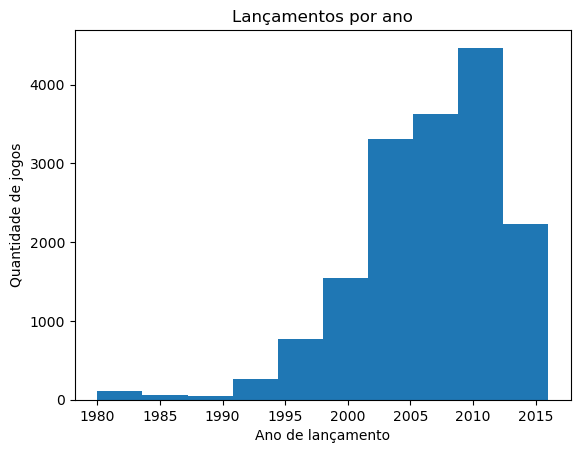

In [13]:
# Excluindo os registros com anos de lançamento ausentes e plotando o histograma.
plt.hist(df[df['year_of_release']>0]['year_of_release'])

plt.title('Lançamentos por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade de jogos')
plt.show()

No histograma acima, observamos como o crescimento no lançamento de jogos dispara com a sua popularização no início dos anos 90, seguido pelo estouro e pelo crescimento exponencial nos anos 2000 até o período de 2010.

Com o aumento de custo da produção dos jogos e a monopolização do mercado de consoles (plataformas), os lançamentos apresentam uma significativa queda até o ano de 2016. Os jogos vão se tornando mais pesados e complexos, o que resulta em uma queda vertiginosa no cardápio de jogos lançados no período.

### 3.2 Estudando as plataformas

A princípio, vamos observar as plataformas com maior presença de títulos em nosso banco de dados.

In [14]:
df['platform'].value_counts().head(15)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
Name: count, dtype: int64

Notamos uma predominância de títulos entre o PlayStation 2 e o Nintendo DS. De fato, foram plataformas de destaque nos anos 2000, período em que observamos uma grande quantidade de lançamentos de jogos no histograma acima.

Em prosseguimento da nossa análise, vamos selecionar as cinco plataformas com mais títulos lançados no período do estudo (PS2, DS, PS3, Wii e X360). Além disso, vamos filtrar e observar os dados de lançamento a partir do ano de 2005, ano em que de fato estourou a febre mundial de jogos.

In [15]:
# Filtrando os dados para as 5 plataformas com mais títulos lançados.
df_filtered = df[df['platform'].isin(df['platform'].value_counts().head().index)]

# Filtrando para os lançamentos a partir de 2005.
df_filtered = df_filtered[df_filtered['year_of_release']>=2005]

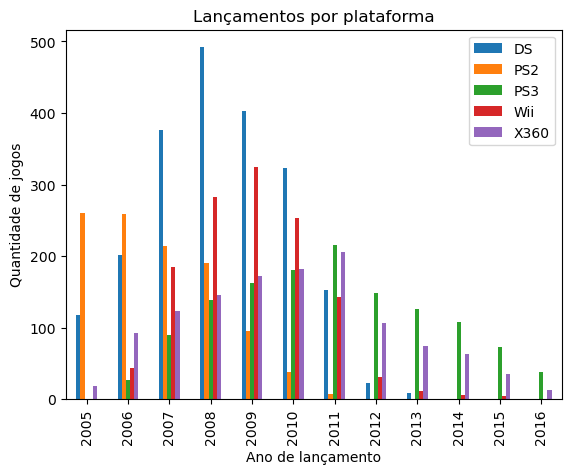

In [16]:
# Agrupando a tabela por ano de lançamento para cada plataforma e fazendo a contagem dos títulos.
df_filtered.groupby(['year_of_release', 'platform'])['name'].count().unstack().plot(kind='bar')

plt.title('Lançamentos por plataforma')
plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade de jogos')

plt.legend()
plt.show()

No gráfico acima, é possível observar como o PlayStation 2 monopolizou o mercado de games até meados de 2006, acompanhado pelo crescimento exponencial de lançamentos de jogos para o Nintendo DS, que chegou a seu ápice em 2008, com cerca de 500 lançamentos naquele ano.

A partir de 2007 observamos a importância da Nintendo no mercado de games, com o crescimento de lançamentos para o Nintendo Wii, fazendo com que a empresa japonesa dominasse o mercado de lançamentos com seus dois consoles entre os anos de 2008 e 2010.

Em 2009, o número de lançamentos decai significativamente quando a Nintendo perde força no mercado de lançamentos para outras plataformas, como o PlayStation 3 e o Xbox 360. A partir de 2011, inicia-se a polarização entre a Sony e a Microsoft pela disputa do mercado dos jogos.

No gráfico acima, de lançamentos em anos recentes, existe uma queda notável no lançamento de jogos a partir dos anos 2010. Portanto, para prosseguirmos trabalhando nossa análise, selecionaremos apenas os cinco anos mais recentes do nosso conjunto de dados (de 2012 a 2016).

Essa filtragem é importante para observamos o comportamento de compras de nossos clientes em um período mais moderno, no qual a oferta de plataformas é mais ajustada ao período em que pretendemos trabalhar nossas campanhas de publicidade.

#### 3.2.1 Filtragem por período (2012 a 2016)

In [17]:
# Filtrando os dados de nossa tabela para lançamentos a partir de 2012.
df_on_work = df[df['year_of_release']>=2012]

# Filtrando as 10 plataformas com mais lançamentos no novo período.
df_platforms = df_on_work[df_on_work['platform'].isin(df_on_work['platform'].value_counts().head(10).index)]

In [18]:
# Contagem de lançamentos no período 2012-2016.
df_on_work['year_of_release'].value_counts()

year_of_release
2012    653
2015    606
2014    581
2013    544
2016    502
Name: count, dtype: int64

A partir de agora, vamos trabalhar com o número de vendas de títulos das dez plataformas com maior quantidade de lançamentos de 2012 até 2016.

Com a criação da coluna *total_sales*, pudemos obter o total de vendas de cada título no período em estudo. Assim, podemos observar o retorno financeiro dado pelos títulos lançados para cada plataforma. Selecionamos as dez plataformas mais populares para análise.

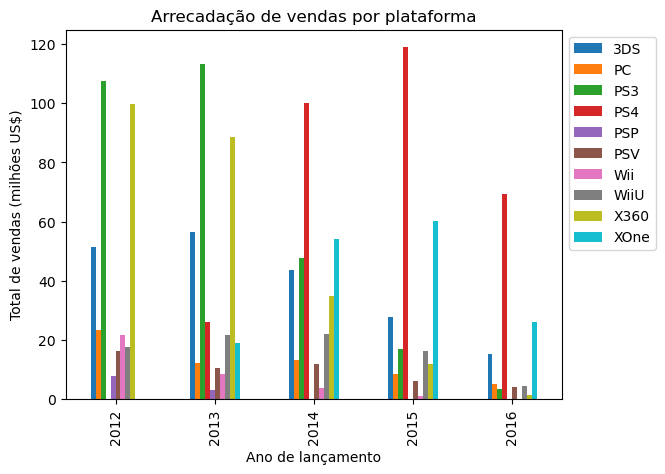

In [19]:
# Agrupando a tabela por ano de lançamento e somando as vendas de cada plataforma.
df_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(kind='bar')

plt.title('Arrecadação de vendas por plataforma')
plt.xlabel('Ano de lançamento')
plt.ylabel('Total de vendas (milhões US$)')

plt.legend(bbox_to_anchor=(1, 1)) # Reposicionando a legenda para que não atrapalhe a visualização do gráfico.
plt.show()

É possível observar o predadorismo do mercado de jogos, e como seu comportamento varia bastante durante os anos. Até o ano de 2013, PS3 e X360 dominavam as vendas de jogos. Com o advento dos consoles de nova geração (PS4 e XOne), esses passaram a tomar o controle das vendas a partir de 2014. Em 2016, mal é possível notar a existência de vendas para as duas plataformas que dominavam o mercado até 3 anos antes.

Durante o período em recorte, cabe destacar a constância de vendas do WiiU de 2012 a 2015, que apenas começa a cair em 2016, além da consistência no número de vendas do 3DS, que foi o terceiro console com mais vendas de títulos durante quatro dos cinco anos em destaque.

Por fim, observamos a consolidação das vendas de jogos para PC, que se mantêm estáveis durante quase todo o período em estudo, atingindo o quarto maior número de vendas em 2016, apesar de ainda apresentar números bem inferiores aos demais concorrentes.

#### 3.2.2 Bloxpot das plataformas

Construíremos agora um diagrama de caixa (boxplot) para consultar e analisar os valores de vendas globais por plataforma atingidos no período de 2012 a 2016.

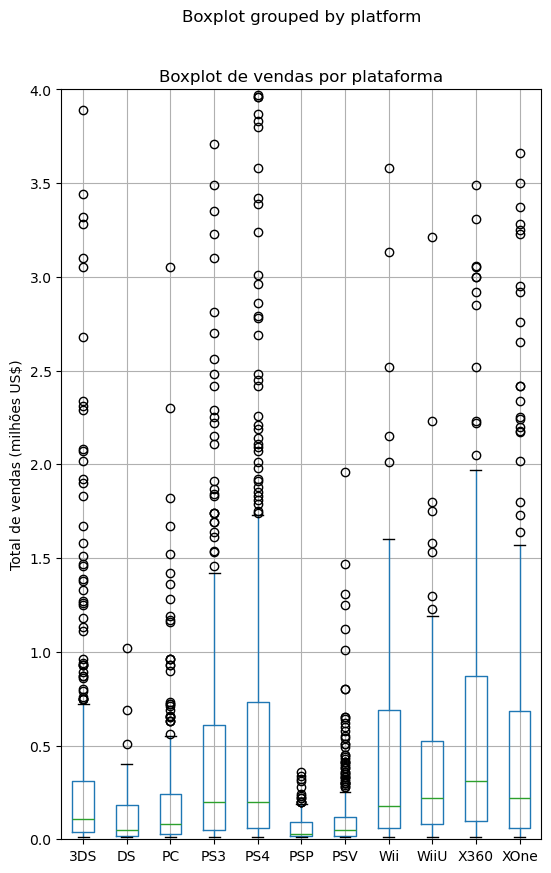

In [20]:
# Plotando o boxplot das vendas por plataforma.
df_on_work.boxplot('total_sales', 'platform', figsize=(6,10))

plt.title('Boxplot de vendas por plataforma')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')

# Limite até 4 milhões US$ em vendas
plt.ylim(0, 4)
plt.show()

Por meio desse boxplot das vendas globais para todas as plataformas nos últimos cinco anos, observamos que os valores isolados por plataforma se mantiveram próximos, em média na casa das 120 mil vendas em dólares. Consoles como o PSP e o PS Vita tiveram um desempenho bastante inferior aos demais.

O destaque vai para as vendas de títulos do Xbox 360, que apresentaram um maior valor na mediana (Q2) e nos primeiro e terceiro quartis (Q1 e Q3). O valor máximo de suas vendas também foi o maior dentre os consoles presentes na análise.

Cabe destacar a grande presença de outliers em todas as plataformas, o que era previsto, tendo em vista que são muito poucos os jogos que realmente se tornam destaques de vendas dentre todos aqueles títulos lançados anualmente para cada plataforma. No boxplot acima foi necessário limitar a visualização até 4 milhões em vendas, pois há títulos que superaram por muito esses valores.

Ademais, todos os diagramas de vendas no período apresentaram um desvio positivo. Isso significa que valores maiores de vendas aparecem com maior frequência.

### 3.3 Influência das avaliações

Verificaremos agora a influência das notas de avaliação da crítica e dos usuários em relação às vendas dos jogos, para analisar se uma maior ou menor avaliação tem peso no número de vendas dos títulos.

In [21]:
df_ps4 = df[df['platform']=='PS4']

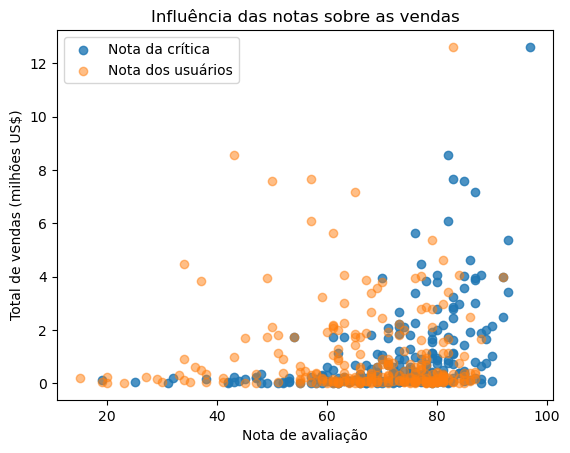

In [22]:
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.8)
plt.scatter(df_ps4['user_score']*10, df_ps4['total_sales'], alpha=0.5)

plt.title('Influência das notas sobre as vendas')
plt.xlabel('Nota de avaliação')
plt.ylabel('Total de vendas (milhões US$)')

plt.legend(['Nota da crítica', 'Nota dos usuários'])
plt.show()

Podemos observar e concluir que sim, títulos com maiores avaliações apresentaram maior concentração das vendas, tanto nas avaliações da crítica, quanto nas avaliações de usuário que puderam jogar e atribuir suas notas posteriormente.

Comparando as duas dispersões, como fizemos acima, notamos que avaliações positivas da crítica tiveram um peso maior na venda dos jogos.

In [23]:
df.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Em termos gerais, os jogos da Nintendo foram o grande destaque de vendas, com ênfase ao Wii Sports, que apesar de não ter feito tanto sucesso no Japão, bateu recordes na América do Norte, na Europa e nas demais regiões do estudo, somando mais que o dobro de vendas do segundo colocado, Super Marios Bros.

Apesar de muitos dos jogos mais antigos não apresentarem suas notas de avaliação, cabe observarmos o caso do Wii Play. O jogo, apesar de ser o oitavo mais vendido de nossa tabela de dados, foi o destaque negativo por conta de suas avaliações negativas, tanto da crítica, quanto dos usuários.

### 3.4 Jogos em múltiplas plataformas

Vamos verificar a lista de jogos para múltiplas plataformas, ou seja, aqueles títulos que foram lançados para várias plataformas ao mesmo tempo.

In [24]:
# Contagem da repetição de valores de jogos (em outras plataformas)
df['name'].value_counts().head(15)

name
Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
LEGO The Hobbit                  8
FIFA Soccer 13                   8
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Monopoly                         8
Lego Batman 3: Beyond Gotham     8
Cars                             8
FIFA 15                          8
Angry Birds Star Wars            8
The LEGO Movie Videogame         8
Name: count, dtype: int64

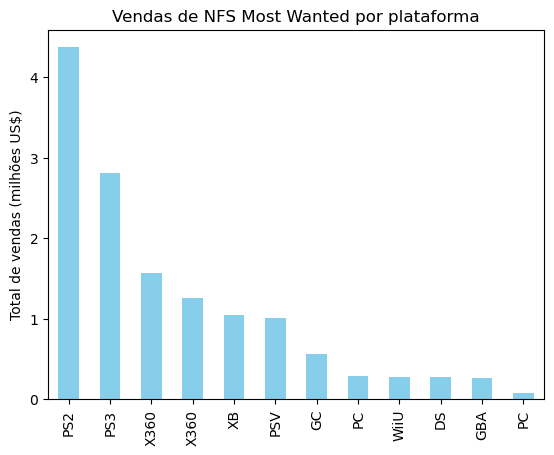

In [25]:
# Verificando as vendas do 'Need for Speed: Most Wanted' em todas as plataformas.
df[df['name']=='Need for Speed: Most Wanted'].plot.bar('platform', 'total_sales', color='skyblue')

plt.title('Vendas de NFS Most Wanted por plataforma')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')

plt.legend().remove()
plt.show()

Podemos conferir que o *Need for Speed: Most Wanted* foi lançado para 12 plataformas ao mesmo tempo. Nos números acima, concluímos que o jogo foi um sucesso de vendas no PlayStation 2, e que também sobreviveu à transição para o PS3, onde teve o seu segundo maior número de vendas.

In [26]:
df_on_work.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Já no período em destaque (2012 a 2016), o jogo mais vendido foi o GTA V, com um total de 21 milhões de dólares arrecados em vendas para o PS3.

Reparamos, na tabela acima, que o jogo também foi o segundo mais vendido. Isso se deve ao fato de GTA V ser um jogo lançado em múltiplas plataformas. Sendo assim, o jogo bateu recordes de vendas tanto no PS3 quanto no Xbox 360.

Além disso, o jogo foi o segundo lançamento mais vendido para o PS4 no nosso conjunto de dados. Realmente, um verdadeiro sucesso!

#### 3.4.1 Jogos 'Blockbuster': sucessos de vendas

Nesse momento, vamos trabalhar apenas com os títulos 'Blockbuster', isto é, aqueles jogos que foram sucessos de vendas em diversas plataformas.

In [27]:
# No conjunto 'name', verificamos os títulos que tiveram mais de 5 ocorrências.
multiplatform = df_on_work.value_counts(subset='name')
multiplatform[multiplatform > 5].index

Index(['LEGO Marvel Super Heroes', 'FIFA 14', 'Lego Batman 3: Beyond Gotham',
       'FIFA Soccer 13', 'LEGO Jurassic World', 'FIFA 15', 'LEGO The Hobbit',
       'The LEGO Movie Videogame', 'Angry Birds Star Wars',
       'Skylanders: Trap Team', 'Terraria', 'The Amazing Spider-Man 2 (2014)',
       'Skylanders: SuperChargers', 'LEGO Batman 2: DC Super Heroes',
       'Lego Star Wars: The Force Awakens', 'LEGO Marvel's Avengers',
       'LEGO The Lord of the Rings', 'Skylanders SWAP Force', 'Darksiders II',
       'Rugby World Cup 2015', 'Just Dance 2015',
       'The Amazing Spider-Man (Console Version)', 'Just Dance 2014',
       'Watch Dogs', 'Call of Duty: Ghosts', 'Just Dance 2016',
       'The Walking Dead: Season One',
       'Disney Infinity 2.0: Marvel Super Heroes', 'Disney Infinity',
       'Turbo: Super Stunt Squad', 'Assassin's Creed IV: Black Flag',
       'Pro Evolution Soccer 2013', 'Rayman Legends', 'Minecraft',
       'Just Dance 2017', 'Madden NFL 13',
       'Adven

In [28]:
# Filtramos os títulos que apareceram mais de 5 vezes no conjunto de dados.
df_multiplatform = df_on_work[df_on_work['name'].isin(multiplatform[multiplatform > 5].index)]

# Ordenamos pelo número de vendas de cada um deles.
df_multiplatform = df_multiplatform.sort_values('total_sales', ascending=False)

In [29]:
# Selecionamos como blockbuster os 25 títulos mais vendidos (em múltiplas plataformas).
blockbuster = df_multiplatform['name'].head(25).value_counts().index

In [30]:
# Filtramos nossa tabela com os 25 títulos mais vendidos.
df_blockbuster = df_multiplatform[df_multiplatform['name'].isin(blockbuster)]

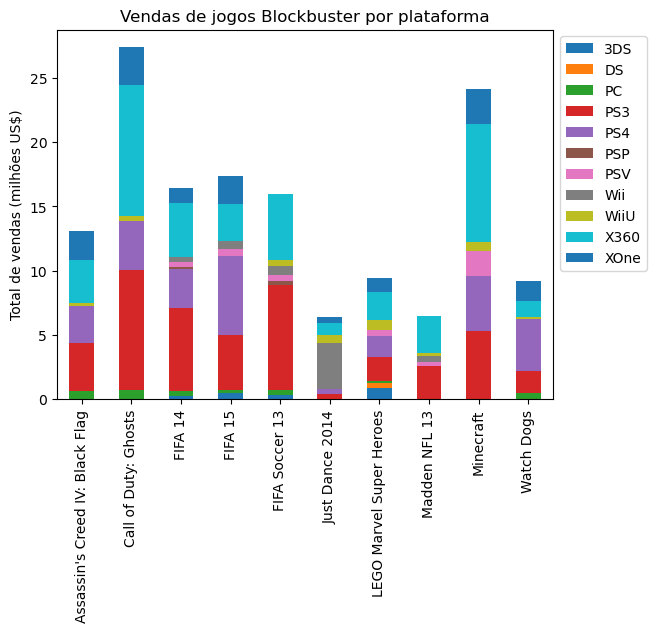

In [31]:
# Agrupamos os 25 primeiros títulos para representar seu total de vendas por plataforma.
df_blockbuster.groupby(['name', 'platform'])['total_sales'].sum().unstack().plot(kind='bar', stacked=True)

plt.title('Vendas de jogos Blockbuster por plataforma')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')

# Empurramos a legenda para fora do gráfico, para melhorar a visualização.
plt.legend(bbox_to_anchor=(1,1))
plt.show()

No gráfico acima, podemos observar os jogos que tiveram mais arrecadação nas vendas para mais de cinco plataformas.

O destaque vai para Call of Duty: Ghosts e Minecraft. Ambos os jogos ultrapassaram a marca de 20 milhões de dólares em vendas considerando todas as plataformas, chegando a vender 10 milhões de dólares a mais que os demais jogos destacados.

Não podemos deixar de mencionar os jogos da franquia FIFA, que se mantiveram constantes na marca de 15 milhões de dólares anuais em vendas, mesmo relançando o título anualmente. O jogo é garantia de boas vendas em múltiplas plataformas.

Ademais, como analisado anteriormente, as plataformas que concentraram o maior número de vendas foram o PS3 e o Xbox 360, com um representativo e interessante registro nas vendas do PS4. O Xbox One também começa a ter certo mercado dentre nossos jogos.

### 3.5 Gêneros de maior sucesso

Em relação aos gêneros mais vendidos no período de estudo, vamos observar o comportamento de nossos clientes e quais são as suas preferências de jogos.

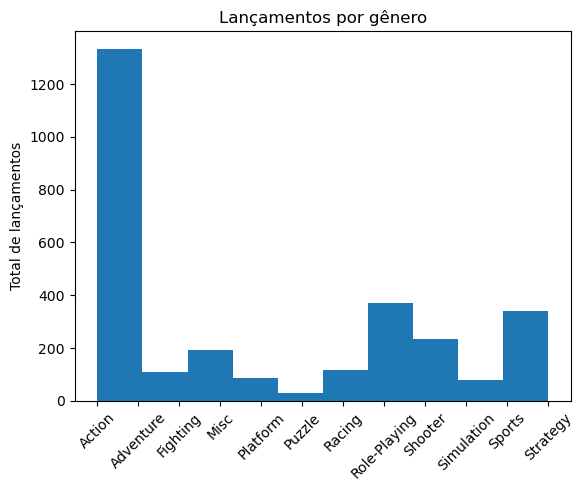

In [32]:
# Plotando um histograma com base no gênero dos jogos.
plt.hist(df_on_work.sort_values('genre')['genre'])

plt.title('Lançamentos por gênero')
plt.xlabel('')
plt.ylabel('Total de lançamentos')

# Ajuste de rótulos do eixo x
plt.xticks(rotation=45)
plt.show()

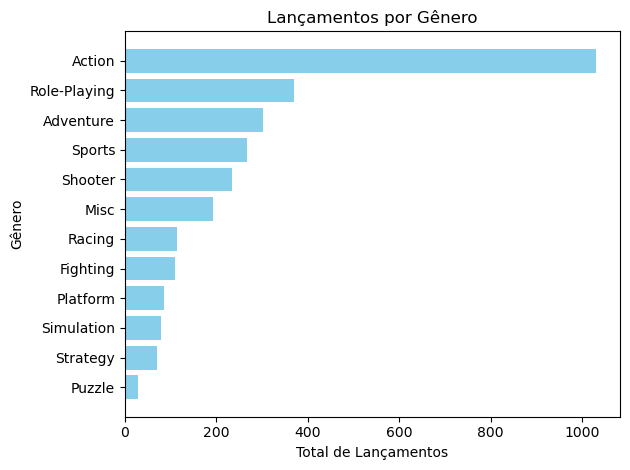

In [33]:
import matplotlib.pyplot as plt

# Contar o número de lançamentos por gênero e ordenar por valores
genre_counts = df_on_work['genre'].value_counts().sort_values()

# Criando o gráfico de barras horizontal
plt.barh(genre_counts.index, genre_counts.values, color='skyblue')

# Títulos e rótulos
plt.title('Lançamentos por Gênero')
plt.xlabel('Total de Lançamentos')
plt.ylabel('Gênero')

# Exibindo o gráfico
plt.tight_layout()  # Garante que os rótulos não fiquem cortados
plt.show()


Em termos de lançamento, a grande maioria dos jogos são do gênero ação. O número de jogos lançados nessa categoria é três vezes maior que o dos demais gêneros concorrentes, superando a marca de 1.200 lançamentos entre 2012 e 2016.

Por outro lado, esportes, RPG (role-playing) e jogos de tiro são outras categorias de destaque, com cerca de 300 lançamentos cada.

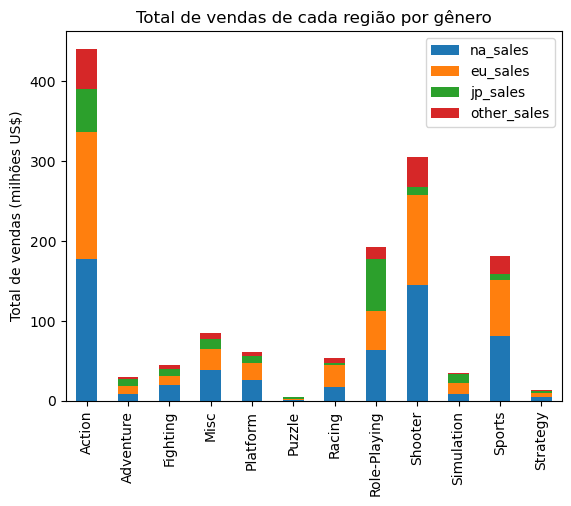

In [34]:
# Agrupando as vendas regionais por gênero e empilhando a apresentação.
df_on_work.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().plot(kind='bar', stacked=True)

plt.title('Total de vendas de cada região por gênero')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')
plt.show()

No tocante às vendas regionais por gênero, observamos mais uma vez o destaque dos jogos de ação, com mais de 400 milhões de dólares arrecadados durante o período de estudo. Apesar de não serem tão populares no Japão, quanto são na América do Norte e na Europa, as vendas de jogos de ação naquele país ficaram atrás apenas dos jogos de RPG, tradicionais entre os japoneses.

Mais uma vez, os jogos de tiro, RPG e esportes se destacaram no número de vendas. Os de tiro chegaram à marca de 300 milhões de dólares em vendas, enquanto os outros dois atingiram os 200 milhões de dólares arrecadados. Com exceção dos jogos de RPG, o comportamento de vendas regionais dos demais jogos se assemelha, com boas vendas na América do Norte e na Europa, mas com baixos números nas outras regiões do estudo.

## 4. Verificando o perfil de cada região

Aprofundando nosso estudo, vamos analisar o perfil dos clientes das nossas três regiões de destaque: América do Norte, Europa e Japão.

### 4.1 Perfil de vendas por plataforma

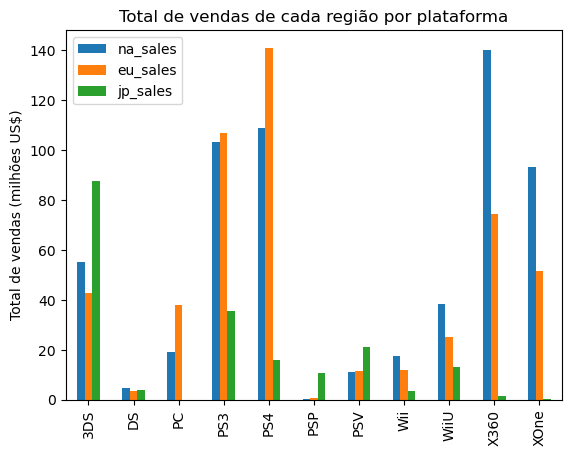

In [35]:
# Agrupando por plataforma as vendas das três regiões (NA, EU e JA).
df_on_work.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar')

plt.title('Total de vendas de cada região por plataforma')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')
plt.show()

Observamos que, entre norte-americanos e europeus, os consoles predominante são os da Sony (PS3 e PS4, preferência dos europeus) e da Microsoft (X360 e XOne, preferidos entre os americanos). Além deles, os jogos de PC e WiiU tiveram vendas significativas em ambas as regiões.

Dentre os compradores japoneses, o 3DS foi o de maior destaque, superando em até 80% as vendas das outras duas regiões. PSP, que teve um número insignificante de vendas nas outras regiões, e o PS Vita também foram destaques de vendas no Japão. Já os jogos de PC, X360 e XOne aparentam não interessar aos japoneses.

### 4.2 Perfil de vendas por gênero

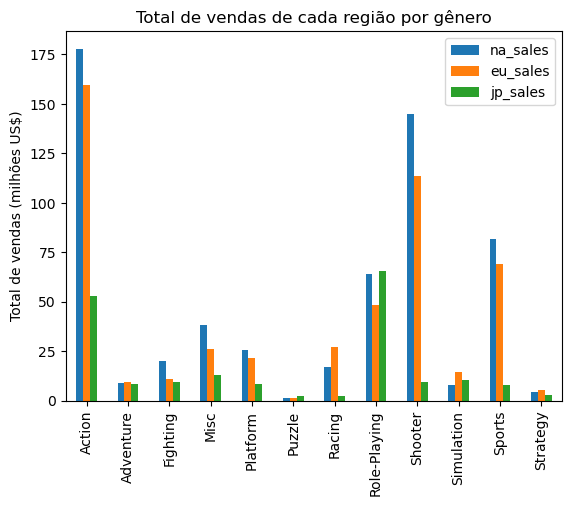

In [36]:
# Agrupando por gênero as vendas das três regiões (NA, EU e JA).
df_on_work.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar')

plt.title('Total de vendas de cada região por gênero')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')
plt.show()

Quanto aos gêneros preferidos de cada região, podemos notar mais uma vez a semelhança entre os perfis de vendas da América do Norte e Europa, com grande destaque para os jogos de ação batendo a marca de 175 milhões de dólares em vendas entre os norte-americanos.

Ente os japoneses, o perfil de jogos preferido segue sendo o de RPG, gênero no qual lideram as vendas seguidos de perto pelos norte-americanos. Em seguida, temos os jogos de ação como preferência no Japão.

No gráfico também é interessante observar em quais gêneros os europeus detêm o maior número de vendas. Em corrida, simulação, estratégia e aventura, apesar do número baixo de vendas comparado aos demais estilos, os jogos foram mais vendidos na Europa, principalmente os de simulação e corrida.

### 4.3 Perfil de vendas por classificação de conteúdo

In [37]:
# Agrupando por categoria de conteúdo as vendas das três regiões (NA, EU e JA).
df_esrb = df_on_work.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
df_esrb

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02


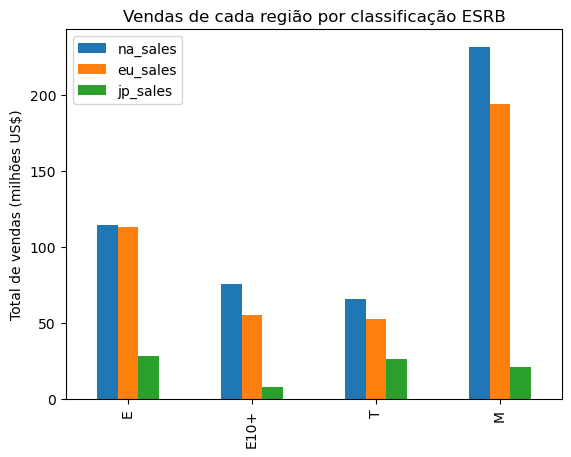

In [38]:
# Reordenando os índices para a ordem adequada (E -> E10+ -> T -> M).
df_esrb.reindex(['E', 'E10+', 'T', 'M']).plot(kind='bar')

plt.title('Vendas de cada região por classificação ESRB')
plt.xlabel('')
plt.ylabel('Total de vendas (milhões US$)')
plt.show()

Observamos que as vendas de jogos com conteúdo indicado para maiores de 17 anos dispararam na América do Norte e na Europa, em comparação com as demais categorias de censura de conteúdo, enquanto no Japão as vendas se mantiveram próximas entre todas as categorias.

A categoria na qual as vendas das três regiões de análise mais se aproximaram foi a Teen (até 13 anos), enquanto os números de vendas na categoria Everyone entre norte-americanos e europeus também foram bem superiores aos japoneses.

## 5. Testando as hipóteses

A partir de agora, iremos testar hipóteses aplicadas para verificar a semelhança entre duas médias de nosso conjunto de dados independentes entre si. Para tanto, aplicaremos o teste t de Student, atribuíremos o valor padrão de 5% (0.05) para nosso nível de significância e analisaremos se as hipóteses podem ou não ser rejeitadas.

- **Hipótese 1:** as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

- **Hipótese 2:** as classificações médias dos usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

### 5.1 Hipótese 1

Primeiramente, vamos testar a hipótese de que **as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas**. Dessa forma, essa será nossa hipótese nula, e por meio do teste t de Student, iremos julgar a hipótese dada e analisar se podemos ou não recusá-la.

Por outro lado, nossa hipótese alternativa será que as classificações médias entre os usuários das plataformas Xbox One e PC são diferentes.

In [39]:
# Filtramos a amostra pelas notas de usuário de XOne e calculamos sua variância.
users_xone = df_on_work[df_on_work['platform']=='XOne']['user_score'].dropna()

print(f'Variância das notas de usuário de Xbox One: {users_xone.var()}')

Variância das notas de usuário de Xbox One: 1.9069968429360702


In [40]:
# Filtramos a amostra pelas notas de usuário de PC e calculamos sua variância.
users_pc = df_on_work[df_on_work['platform']=='PC']['user_score'].dropna()

print(f'Variância das notas de usuário de PC: {users_pc.var()}')

Variância das notas de usuário de PC: 2.7704439971584156


In [41]:
# Testando a hipótese: classificações médias dos usuários de XOne e PC são as mesmas.

alpha = .05 # Atribuímos 0.05 como valor do nível de significância.
results = st.ttest_ind(users_xone, users_pc) # Aplicamos as médias em estudo, considerando a igualdade das variâncias.

print(f'valor-p: {results.pvalue}')

if (results.pvalue < alpha): # Comparamos o valor-p com o nível de significância para avaliar a hipótese
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.5535080500643661
Não podemos rejeitar a hipótese nula


Analisando o valor-p, observamos que o valor está muito acima do nosso nível de significância (de 0.05), o que indica que não podemos rejeitar a nossa hipótese nula.

Rejeitando a hipótese alternativa, identificamos que as classificações médias dos usuários de Xbox One e PC são praticamente as mesmas.

### 5.2 Hipótese 2

Agora vamos testar a hipótese de que **as classificações médias dos usuários para os gêneros Action (ação) e Sports (esportes) são diferentes**. Dessa forma, essa será nossa hipótese nula, e por meio do teste t de Student, iremos julgar a hipótese dada e analisar se podemos ou não recusá-la.

Por outro lado, nossa hipótese alternativa será que as classificações médias entre os usuários dos gêneros Action e Sports são as mesmas.

In [42]:
# Filtramos a amostra pelas notas do gênero Action (ação) e calculamos sua variância.
users_action = df_on_work[df_on_work['genre']=='Action']['user_score'].dropna()

print(f'Variância das notas de usuário de Xbox One: {users_action.var()}')

Variância das notas de usuário de Xbox One: 1.8890840494348116


In [43]:
# Filtramos a amostra pelas notas do gênero Sports (esportes) e calculamos sua variância.
users_sports = df_on_work[df_on_work['genre']=='Sports']['user_score'].dropna()

print(f'Variância das notas de usuário de Xbox One: {users_sports.var()}')

Variância das notas de usuário de Xbox One: 3.022890298704733


In [44]:
# Testando a hipótese: classificações médias dos usuários dos gêneros Action e Sports são diferentes.

alpha = .05 # Atribuímos 0.05 como valor do nível de significância.
results = st.ttest_ind(users_action, users_sports) # Aplicamos as médias em estudo, considerando a igualdade das variâncias.

print(f'valor-p: {results.pvalue}')

if (results.pvalue >= alpha): # Comparamos o valor-p com o nível de significância para avaliar a hipótese
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 3.7163089460934874e-26
Não podemos rejeitar a hipótese nula


Analisando o valor-p, observamos que o valor está bem abaixo do nosso nível de significância (de 0.05), o que indica que não podemos rejeitar a nossa hipótese nula.

Rejeitando a hipótese alternativa, identificamos que as classificações médias dos usuários dos gêneros Action e Sports são possivelmente bem diferentes.

## 6. Conclusão Geral

Ao final do nosso estudo de caso, podemos concluir que os perfis de usuário da América do Norte e da Europa são bem diferentes do Japão e das outras regiões do conjunto de dados. Usuário dessas duas regiões têm preferências por lançamentos de jogos de ação para as plataformas da Sony e da Microsoft, enquanto os japoneses deram prioridade às compras dos jogos de RPG para 3DS.

Observamos também que sempre existirão jogos que se destacarão mais que a grande maioria, e que, apesar de serem considerados outliers em nosso estudo, podem ser bem trabalhados nas próximas campanhas publicitárias, pois representam boa parte da arrecadação de vendas dos jogos, mesmo em múltiplas plataformas.

Com a queda no número de lançamento dos jogos nos últimos anos, se tornou mais objetivo priorizar campanhas de marketing para os novos lançamentos, principalmente de jogos que despertam grande expectativa do público-alvo.

As avaliações da crítica e dos usuários têm grande influência nas vendas dos jogos, estando os jogos mais bem avaliados quase sempre entre os mais vendidos. Por outro lado, o fato de um jogo limitar a faixa etária de seus usuários por conta de seu conteúdo não parece ter um papel tão relevante nas vendas, visto que a arrecadação com jogos para maiores de 17 anos foi bem superior às demais faixas etárias.

Dessa forma, concluímos que futuras campanhas publicitárias devem focar nos lançamentos para os consoles da nova geração PS4 e XOne, principalmente entre os jogos de ação, RPG e esportes, não deixando de acompanhar o crescimento no interesse para os jogos de PC, principalmente para o pública norte-americano e europeu.

No caso do Japão, a recomendação é de seguir trabalhando sobre o interesse local em jogos de RPG para 3DS, acompanhando o lançamento de novos consoles da Nintendo, e investindo no crescimento das vendas para jogos de ação, principalmente aqueles lançados para o PlayStation 4.

Ademais, também cabe trabalhar as preferências sobre as outras regiões, a fim de que em estudos futuros dos próximos conjuntos de dados possamos ter dados mais específicos de vendas nas demais regiões, como na América do Sul, Oceania e demais partes da Ásia, que são mercados emergentes.